# Introduction:
Diabetes has emerged as a global health concern, affecting millions worldwide and imposing a significant burden on healthcare systems. This section will delve into the prevalence of diabetes, its impact on public health, and the critical importance of early detection and intervention.

# Research Objectives and Problem Statement:
Objectives include developing a predictive model for identifying individuals at risk of developing diabetes. and emphasizing the need for accurate prediction models to enable timely interventions and reduce the burden of diabetes-related complications.b

# Literature Review:
1. Demographic Factors:
Demographic factors play a crucial role in diabetes prediction, with age, ethnicity, and socioeconomic status being prominent determinants. Addressing disparities in healthcare access is essential for effective diabetes management and prevention.

2. Lifestyle Choices:
Lifestyle choices significantly influence diabetes risk, with unhealthy behaviours contributing to higher susceptibility. Encouraging healthier lifestyles through education and interventions is critical for diabetes prevention efforts.

3. Biomarkers:
Biomarkers provide valuable insights into diabetes risk assessment, with obesity, hypertension, dyslipidaemia, and HbA1c levels serving as reliable indicators. Monitoring and managing these biomarkers are essential for early detection and prevention of diabetes-related complications.

4. Prediction Models:
Various prediction models, including logistic regression, decision trees, random forests, support vector machines (SVMs), and neural networks, have been employed for diabetes prediction. Each model offers unique strengths and weaknesses in terms of interpretability, accuracy, and computational efficiency.

5. Gaps
The research on diabetes prediction has made significant progress, yet several gaps remain. These gaps include effectively handling missing data,missing features , ensuring thorough data merging techniques, validating models on diverse populations, and emphasising personalised prediction tailored to individual traits.

# Importing Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
diabetes.head()
#The diabetes data set consists of 768 data points, with 9 features each:

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


“Outcome” is the feature we are going to predict, 0 means No diabetes, 1 means diabetes. Of these 768 data points, 500 are labeled as 0 and 268 as 1:

In [11]:
print(diabetes.groupby('Outcome').size())
plot = diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64


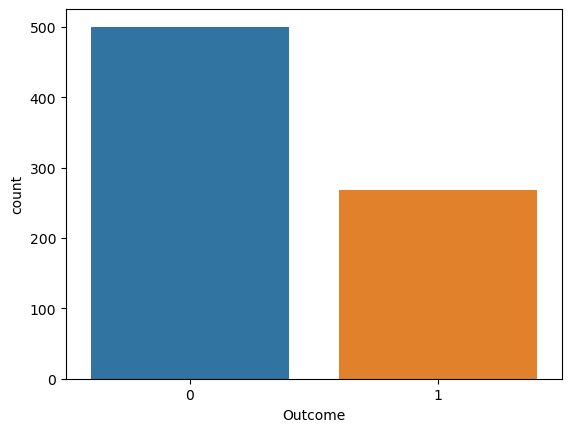

In [17]:
sns.countplot(x='Outcome', data=diabetes, label="Count")
plt.show()

In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


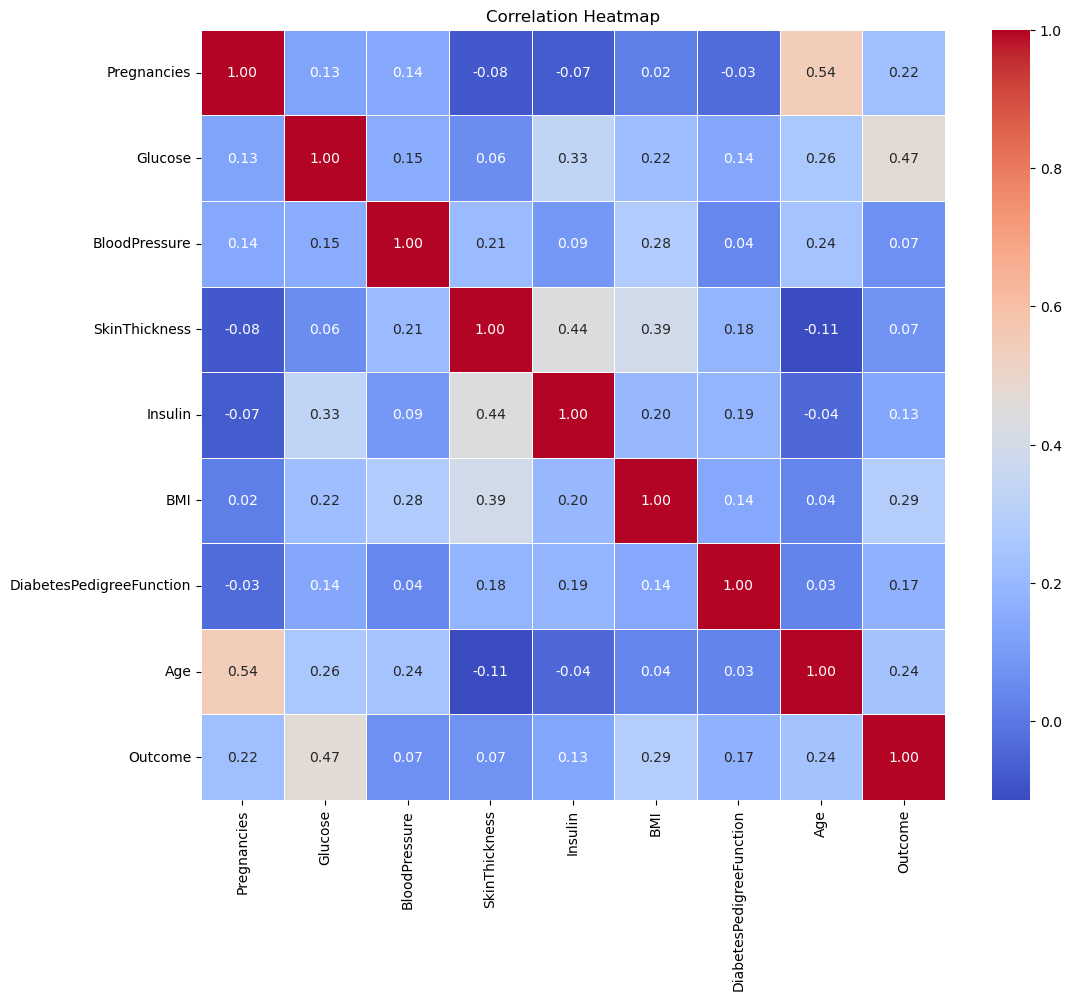

In [21]:
#correlation matrix
corr = diabetes.corr(numeric_only='TRUE')
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Normalizing Data

IndexError: index 16 is out of bounds for axis 0 with size 16

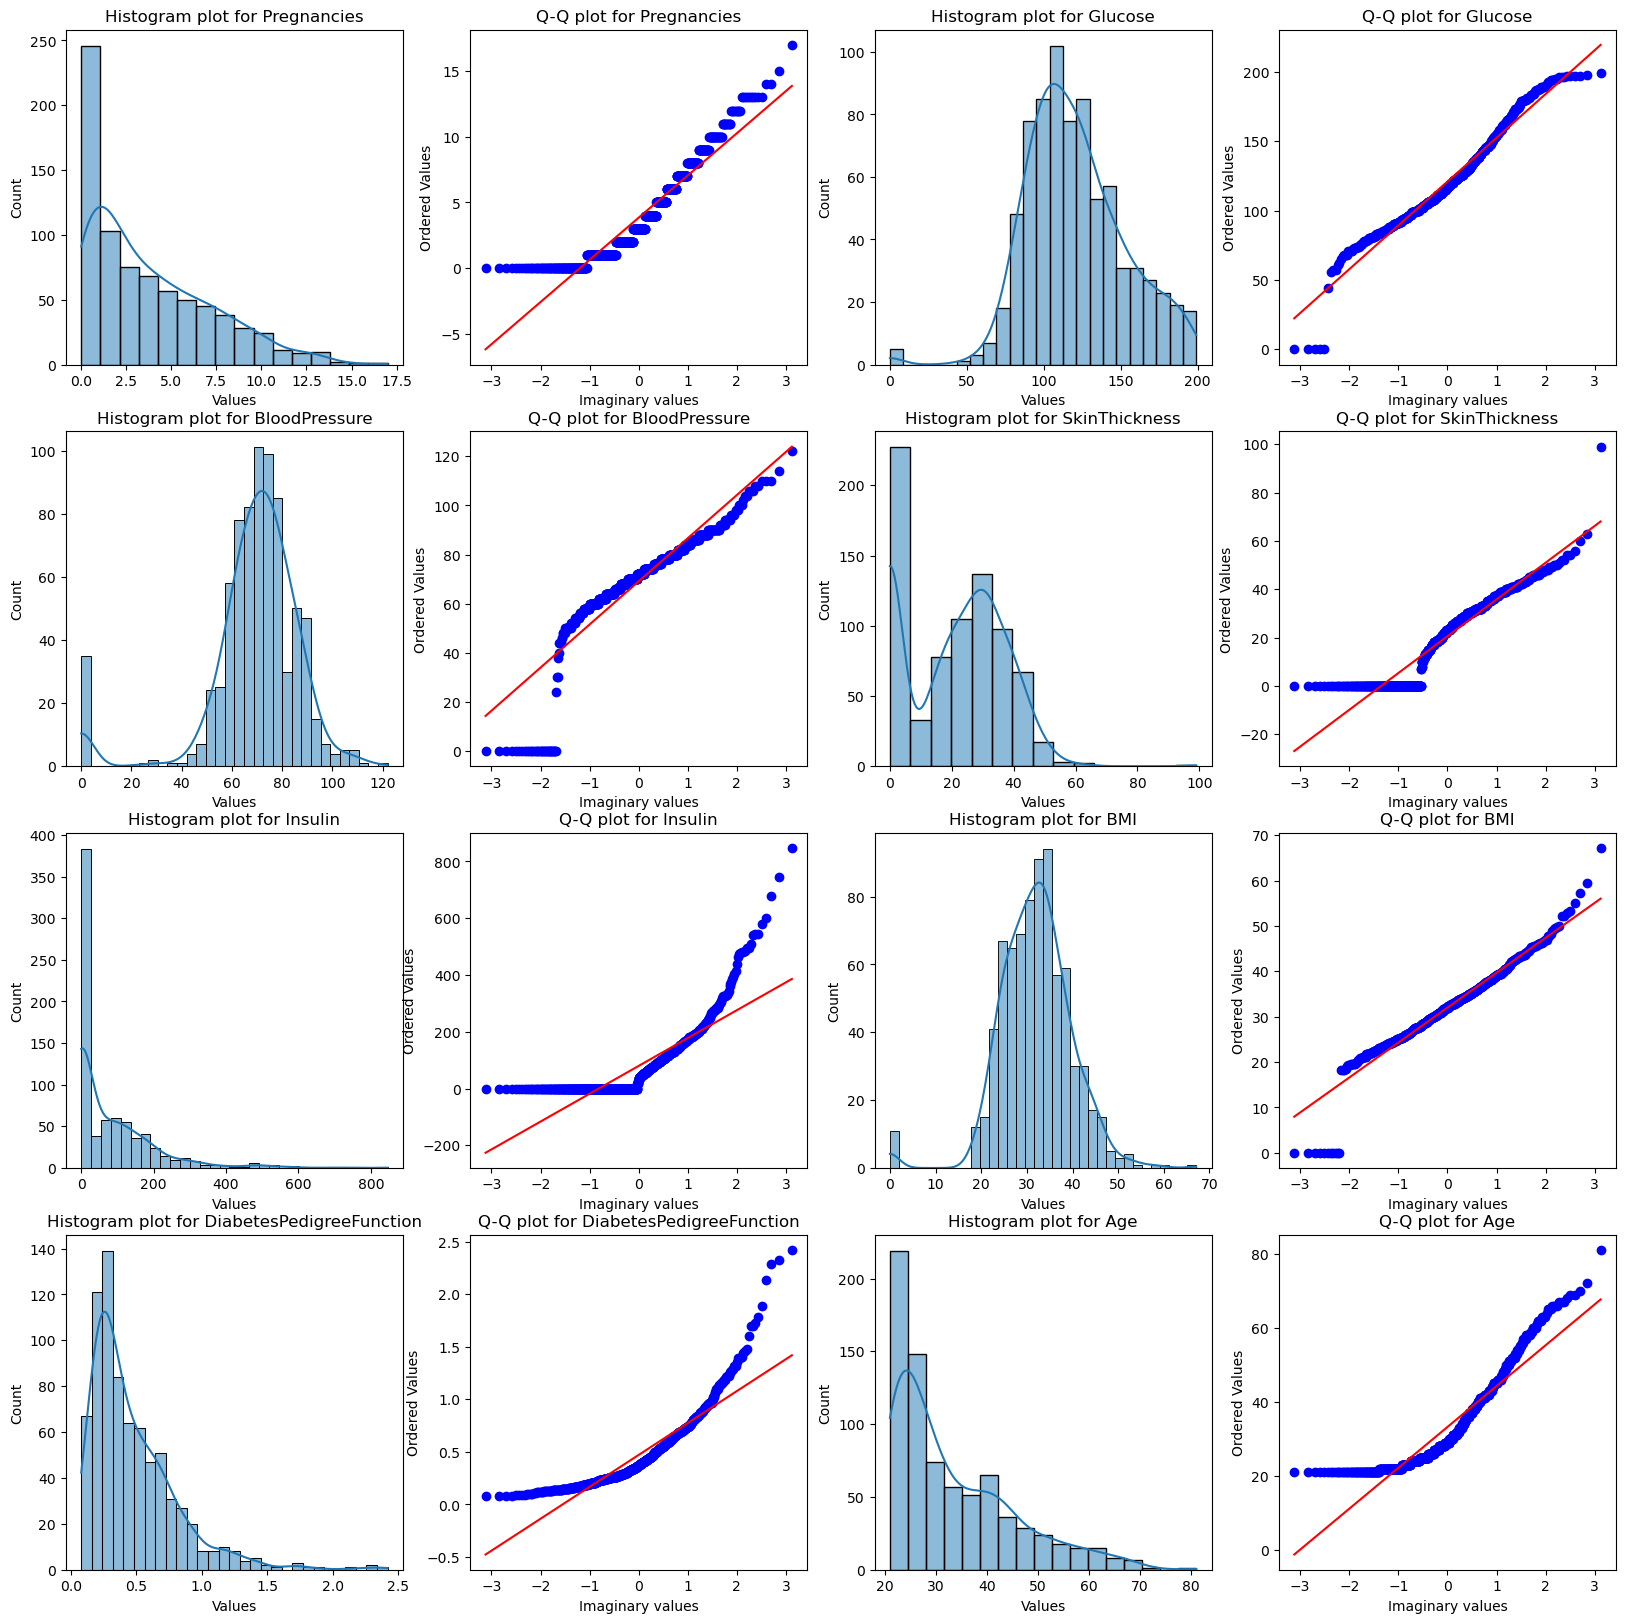

In [29]:
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

df = diabetes.copy()
df = df.iloc[:,0:9]

for i in df.columns:
    df[i] = df[i].sort_values().values

# Assuming 'diabetes' is your DataFrame containing the data
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Assuming there are 16 columns

axes = axes.flatten()
for i, col in enumerate(df.columns):  # Use 'diabetes.columns' to iterate over column names
    # Histogram plot
    sns.histplot(data=df[col], kde=True, ax=axes[i*2])
    axes[i*2].set_title(f"Histogram plot for {col}")
    axes[i*2].set_xlabel("Values")
    
    # Q-Q plot
    stat.probplot(df[col], dist='norm', plot=axes[(i*2)+1])
    axes[(i*2)+1].set_title(f"Q-Q plot for {col}")
    axes[(i*2)+1].set_xlabel("Imaginary values")

plt.tight_layout()
plt.show()

In [30]:
#3.Shapiro wilk test
for i in df.columns:
     shapiro_stats, p_value = stat.shapiro(df[i])
     print(f"\nShapiro Wilk-Test for {i}:\nStatistics : {shapiro_stats}\np_value : {p_value}")
     
     if p_value > 0.05:
         print(f"/nData in {i} follows Normal Distribution\n")
     else:
        print(f"/nData in {i} does not follows Normal Distribution\n")
        
'''CONCLUSION - Thus df_num numeric data does not follows the normal distribution hence using 
                minmax_scale() for normalization of data'''


Shapiro Wilk-Test for Pregnancies:
Statistics : 0.9042831659317017
p_value : 1.6100101271064348e-21
/nData in Pregnancies does not follows Normal Distribution


Shapiro Wilk-Test for Glucose:
Statistics : 0.9701048731803894
p_value : 1.987464880170986e-11
/nData in Glucose does not follows Normal Distribution


Shapiro Wilk-Test for BloodPressure:
Statistics : 0.81892329454422
p_value : 1.5844936208677322e-28
/nData in BloodPressure does not follows Normal Distribution


Shapiro Wilk-Test for SkinThickness:
Statistics : 0.904627799987793
p_value : 1.751799708531821e-21
/nData in SkinThickness does not follows Normal Distribution


Shapiro Wilk-Test for Insulin:
Statistics : 0.7220208644866943
p_value : 7.915339984765649e-34
/nData in Insulin does not follows Normal Distribution


Shapiro Wilk-Test for BMI:
Statistics : 0.9499890208244324
p_value : 1.8407586602041262e-15
/nData in BMI does not follows Normal Distribution


Shapiro Wilk-Test for DiabetesPedigreeFunction:
Statistics : 0.

'CONCLUSION - Thus df_num numeric data does not follows the normal distribution hence using \n                minmax_scale() for normalization of data'

In [32]:
from sklearn.preprocessing import minmax_scale
diabetes1 = minmax_scale(diabetes)  #O/P will be in numpy.ndarray

#converting numpy.ndarray to DataFrame using pandas
diabetes2 = pd.DataFrame(diabetes1,columns=diabetes.columns)
print(diabetes2.head(5))

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0  


# K-Nearest Neighbors to Predict Diabetes

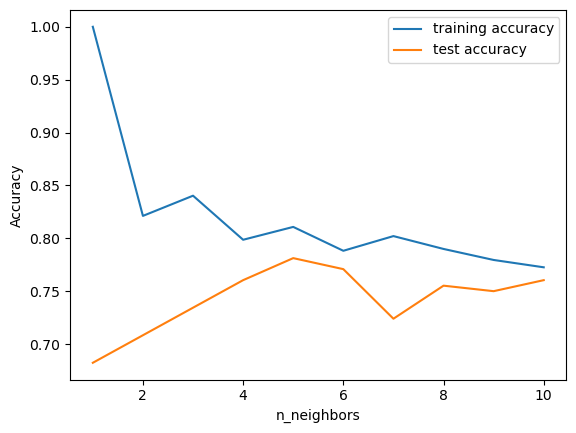

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes2.loc[:, diabetes2.columns != 'Outcome'], diabetes2['Outcome'], stratify=diabetes['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Let’s check the accuracy score of the k-nearest neighbors algorithm to predict diabetes

In [40]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.76


# Decesion Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.719


The accuracy on the training set with Decision Tree Classifier is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

Now, I will do this again by doing set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

1.Overfitting: When a machine learning model learns the training data too well, it may capture noise or irrelevant patterns, making it perform poorly on unseen data. In the case of decision trees, overfitting often occurs when the tree grows too deep and becomes overly complex, memorizing the training data instead of generalizing well to new data.

2.Pre-pruning: Pre-pruning is a technique used to prevent overfitting by limiting the growth of the decision tree during the training process. By setting constraints on parameters such as max_depth, min_samples_split, or min_samples_leaf, we control the size of the tree and prevent it from becoming too deep.

3.max_depth=3: By setting max_depth to 3, we limit the depth of the decision tree to three levels. This means that the tree will only make decisions based on up to three features, making it simpler and less likely to overfit.

4.Impact on Accuracy: When we pre-prune the tree by limiting the depth to 3, the model's accuracy on the training set may decrease because the tree is no longer able to capture all the intricacies of the training data. However, this decrease in training accuracy often results in an improvement in accuracy on the test set because the tree is now better able to generalize to new, unseen data.

In summary, pre-pruning the decision tree by limiting its depth helps prevent overfitting and improves the model's ability to generalize to new data, even though it may lead to a slight decrease in training accuracy.

In [46]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, Y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


# Feature Importance in Decision Trees

In [47]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


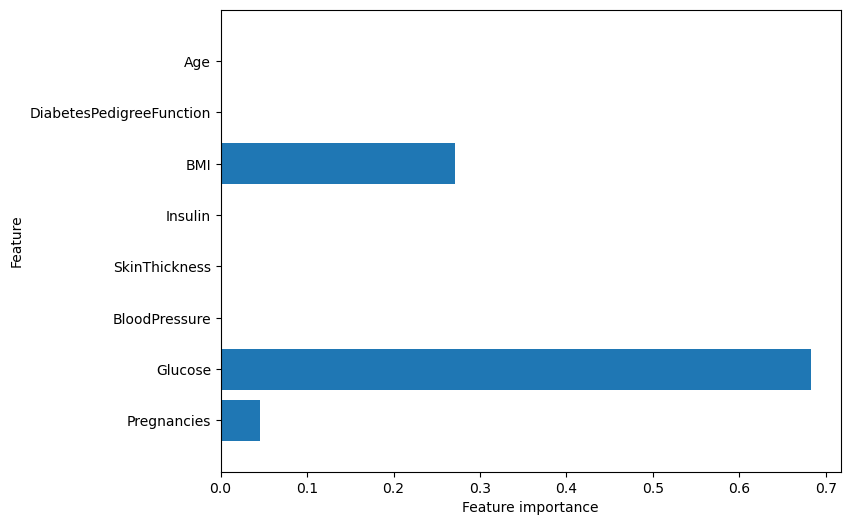

In [68]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),labels = feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_diabetes(tree)

# Deep Learning to Predict Diabetes

In [64]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, Y_test)))

Accuracy on training set: 0.783
Accuracy on test set: 0.807


E:\Softwares\Python files\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Now let’s increase the number of iterations, alpha parameter and add stronger parameters to the weights of the model

In [66]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, Y_test)))

Accuracy on training set: 0.778
Accuracy on test set: 0.766


The result is good, but we are not able to increase the test accuracy further. Therefore, our best model so far is default deep learning model after scaling. Now I will plot a heat map of the first layer weights in a neural network learned on the to predict diabetes using the data set.